### Considerando os dividendos pagos, obtemos o seguinte retornos por portfólio:
#### Portfólio Conservador: R$561.90

####Portfólio Equilibrado: R$606.41

#### Portfólio Arrojado: R$2959.05

### Lembre-se que esse valor inflacionado do portfólio arrojado se deve ao bom desempenho da ação da PetroRio e do contexto descrito nos trabalhos anteriores

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# Definir o intervalo de datas: de 08/08/2018 até 12/06/2024.
start = dt.datetime(2018, 8, 8)
end = dt.datetime(2024, 6, 12 )

# Lista de tickers das empresas

#Portfólio conservador:
tickers_c = [
    'ITUB4.SA',  # Itaú Unibanco
    'ABEV3.SA',  # Ambev
    'VALE3.SA',  # Vale
    'WEGE3.SA',  # Weg
    'BRFS3.SA',  # BRF
    'BBSE3.SA',  # Banco do Brasil Seguros
    'VBBR3.SA',  #Vibra Energia
    'UGPA3.SA'  # Ultrapar
             ]

#Portfólio Equilibrado:
tickers_e = [
    'BBAS3.SA',  # Banco do Brasil
    'ITUB4.SA',  # Itaú Unibanco
    'PETR4.SA',  # Petrobras
    'ITSA4.SA',  # Itaúsa
    'RENT3.SA',  # Localiza
    'EMBR3.SA', # Embraer
    'CIEL3.SA',  # Cielo
    'SUZB3.SA',  # Suzano
    'JBSS3.SA'  #JBS
              ]

#Portfólio mais Arrojado:
tickers_a = [
    'COGN3.SA',  # Cogna
    'CYRE3.SA',  # Cyrela
    'FLRY3.SA',  # Fleury
    'PRIO3.SA',  # PetroRio
    'BRKM5.SA',   # Braskem
    'LREN3.SA',  # Lojas Renner
    'RAIL3.SA',  # Rumo SA
    'PETR4.SA',  # Petrobras
    'WEGE3.SA',  # Weg
    ]

In [42]:
def dados_preços(tickers):
    df = pd.DataFrame()
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")
    df.reset_index(inplace=True)
    return df

In [43]:
df_conservador = dados_preços(tickers_c)
df_equilibrado = dados_preços(tickers_e)
df_arrojado = dados_preços(tickers_a)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [44]:
# Função para baixar e somar os dividendos
def dados_dividendos(tickers):
    dividendos = pd.DataFrame()
    for ticker in tickers:
        try:
            empresa = yf.Ticker(ticker)
            dados_div = empresa.dividends.reset_index()
            dados_div['Ticker'] = ticker
            dados_div['Date'] = dados_div['Date'].dt.tz_localize(None)
            dividendos = pd.concat([dividendos, dados_div], ignore_index=True)
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Calcular a soma dos dividendos por empresa
    soma_dividendos = dividendos.groupby('Ticker')['Dividends'].sum().reset_index()
    return soma_dividendos

In [45]:
div_c = dados_dividendos(tickers_c)
div_e = dados_dividendos(tickers_e)
div_a = dados_dividendos(tickers_a)

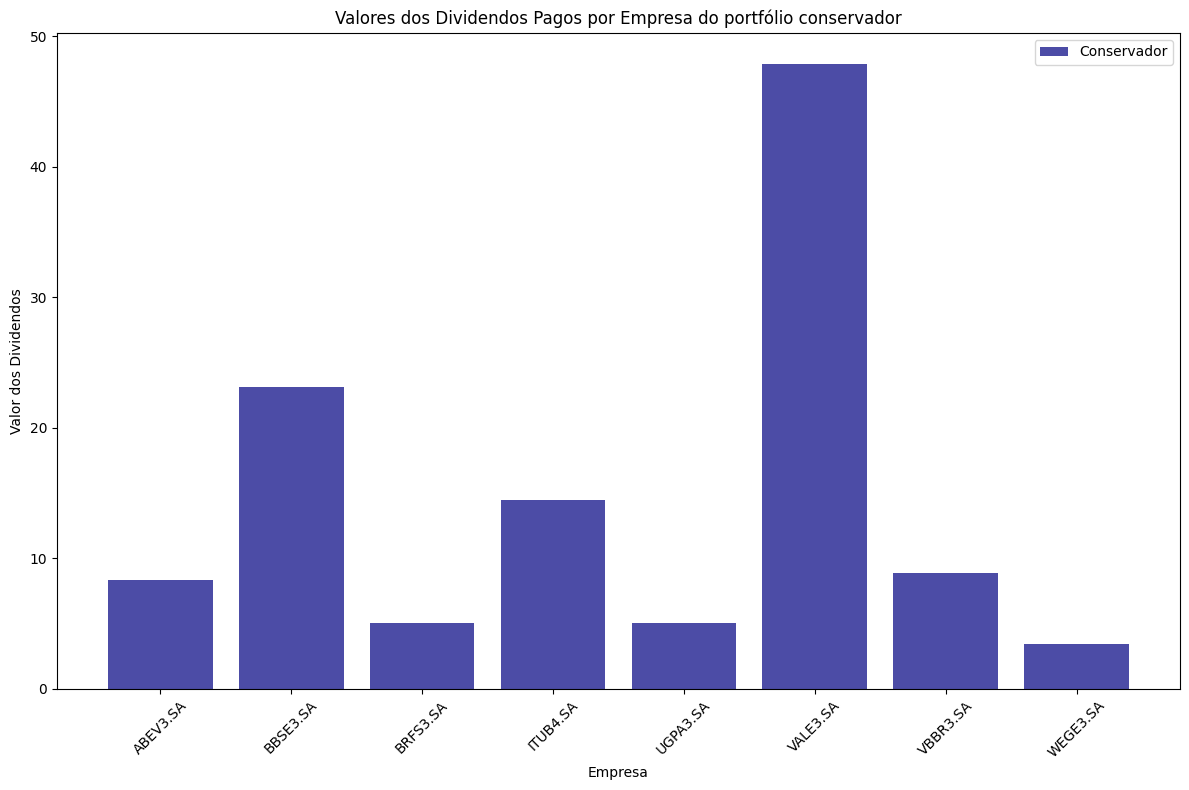

In [49]:
# Configurações do gráfico
plt.figure(figsize=(12, 8))
plt.title('Valores dos Dividendos Pagos por Empresa do portfólio conservador')
plt.xlabel('Empresa')
plt.ylabel('Valor dos Dividendos')

# Plotar os valores dos dividendos para cada portfólio
plt.bar(div_c['Ticker'], div_c['Dividends'], color='navy', alpha=0.7, label='Conservador')

# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


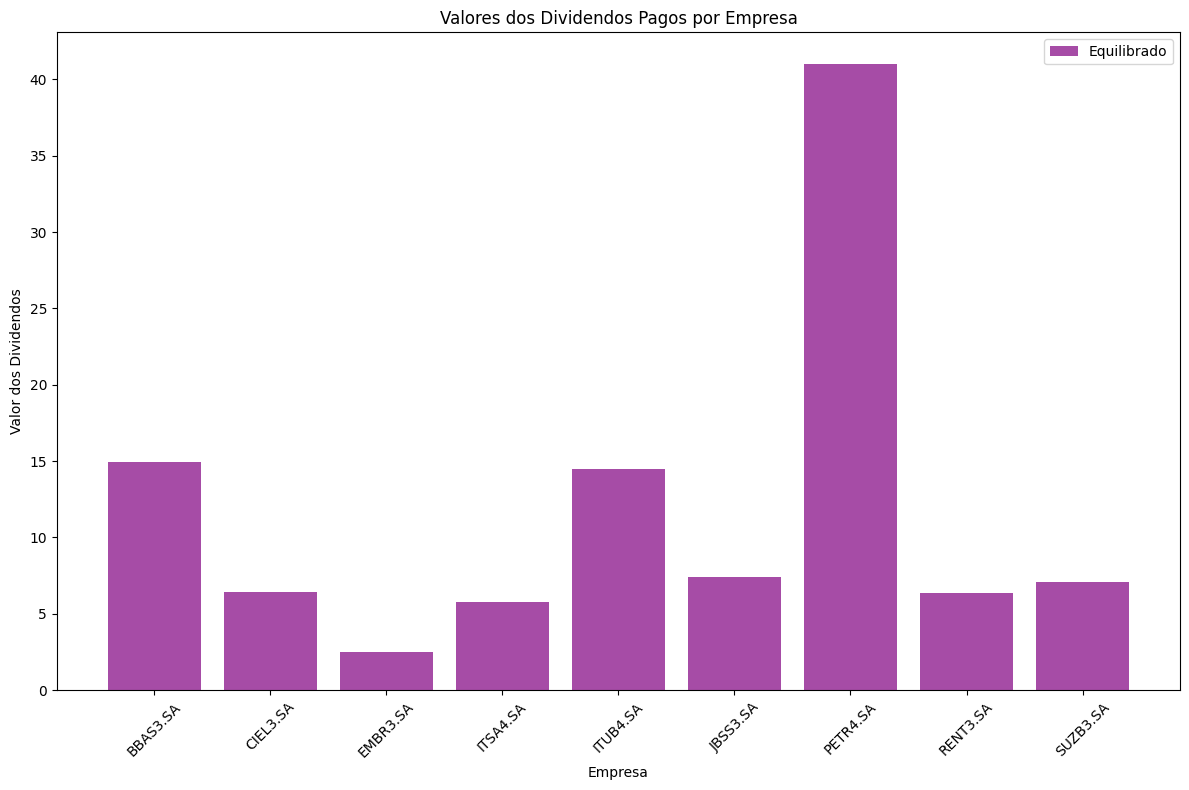

In [50]:
# Configurações do gráfico
plt.figure(figsize=(12, 8))
plt.title('Valores dos Dividendos Pagos por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Valor dos Dividendos')
plt.bar(div_e['Ticker'], div_e['Dividends'], color='purple', alpha=0.7, label='Equilibrado')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

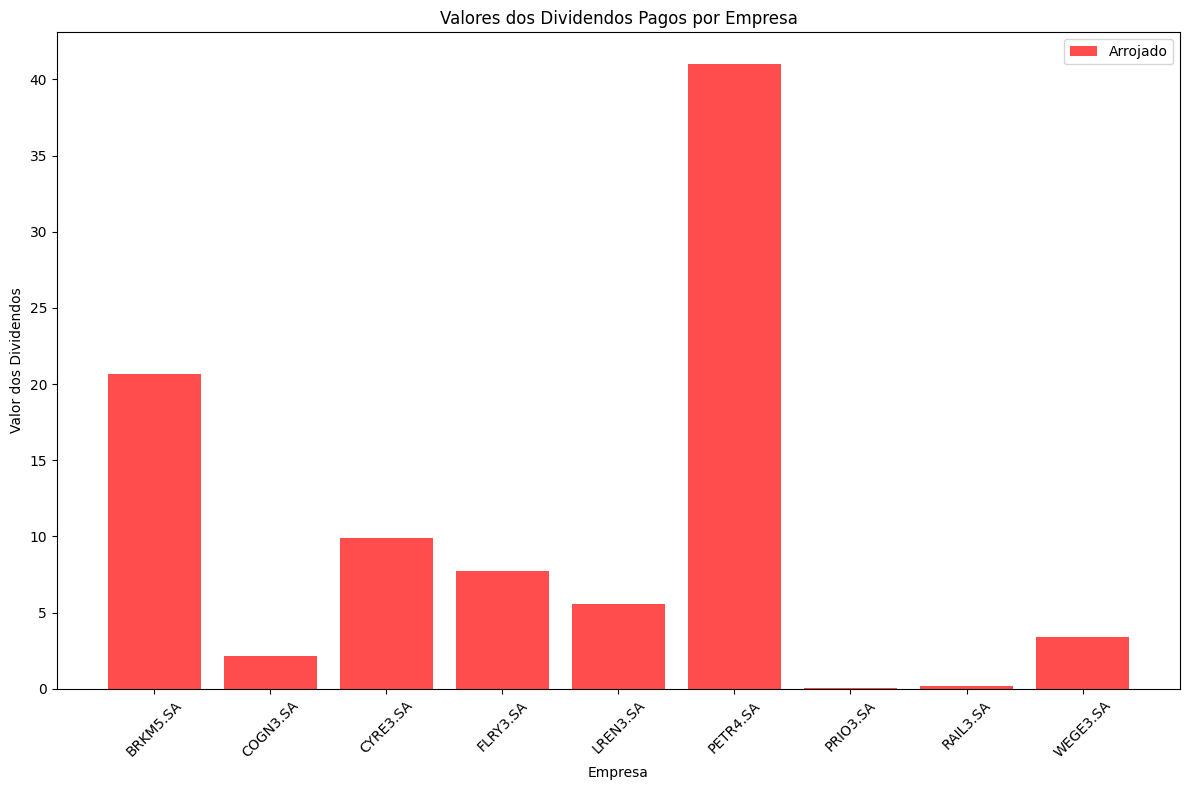

In [51]:
# Configurações do gráfico
plt.figure(figsize=(12, 8))
plt.title('Valores dos Dividendos Pagos por Empresa')
plt.xlabel('Empresa')
plt.ylabel('Valor dos Dividendos')
plt.bar(div_a['Ticker'], div_a['Dividends'], color='r', alpha=0.7, label='Arrojado')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# Exibir a soma dos dividendos
print('Somatório dos dividendos pagos do portfólio conservador:')
print(div_c)
print()
print('Somatório dos dividendos pagos do portfólio equilibrado:')
print(div_e)
print()
'Somatório dos dividendos pagos do portfólio arrojado:'
print(div_a)

Somatório dos dividendos pagos do portfólio conservador:
     Ticker  Dividends
0  ABEV3.SA   8.327501
1  BBSE3.SA  23.119104
2  BRFS3.SA   5.053813
3  ITUB4.SA  14.464892
4  UGPA3.SA   5.031874
5  VALE3.SA  47.857734
6  VBBR3.SA   8.832930
7  WEGE3.SA   3.424951

Somatório dos dividendos pagos do portfólio equilibrado:
     Ticker  Dividends
0  BBAS3.SA  14.961651
1  CIEL3.SA   6.439925
2  EMBR3.SA   2.518968
3  ITSA4.SA   5.774105
4  ITUB4.SA  14.464892
5  JBSS3.SA   7.401434
6  PETR4.SA  41.032286
7  RENT3.SA   6.364017
8  SUZB3.SA   7.105619

     Ticker  Dividends
0  BRKM5.SA  20.649212
1  COGN3.SA   2.128259
2  CYRE3.SA   9.908162
3  FLRY3.SA   7.742661
4  LREN3.SA   5.566230
5  PETR4.SA  41.032286
6  PRIO3.SA   0.072644
7  RAIL3.SA   0.177726
8  WEGE3.SA   3.424951


In [59]:
def calcular_retorno_total(df, dividendos, investimento_inicial=1000):
    retorno_total = 0
    for ticker in df.columns[1:]:
        preco_compra = df[ticker].iloc[0]  # Preço de compra da ação
        preco_atual = df[ticker].iloc[-1]  # Preço atual da ação
        alocacao = investimento_inicial / len(df.columns[1:])  # Alocação inicial para cada ação
        if preco_compra == 0:
            print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
            continue
        acoes_compradas = alocacao / preco_compra  # Número de ações compradas
        retorno_acao = (preco_atual - preco_compra) * acoes_compradas + dividendos[dividendos['Ticker'] == ticker]['Dividends'].sum()
        retorno_total += retorno_acao
    return retorno_total

In [60]:
retorno_total_conservador = calcular_retorno_total(df_conservador, div_c)
retorno_total_equilibrado = calcular_retorno_total(df_equilibrado, div_e)
retorno_total_arrojado = calcular_retorno_total(df_arrojado, div_a)

In [61]:
print(f"Retorno Total do Portfólio Conservador: R${retorno_total_conservador:.2f}")
print(f"Retorno Total do Portfólio Equilibrado: R${retorno_total_equilibrado:.2f}")
print(f"Retorno Total do Portfólio Arrojado: R${retorno_total_arrojado:.2f}")

Retorno Total do Portfólio Conservador: R$561.90
Retorno Total do Portfólio Equilibrado: R$606.41
Retorno Total do Portfólio Arrojado: R$2959.05


In [66]:
investimento_inicial = 1000
retorno_total = 0

# Calcular o retorno total do portfólio para o portfólio conservador
for ticker in df_conservador.columns[1:]:
    preco_compra = df_conservador[ticker].iloc[0]  # Preço de compra da ação
    print(f"Preço de compra para {ticker}: {preco_compra}")

    preco_atual = df_conservador[ticker].iloc[-1]  # Preço atual da ação
    print(f"Preço atual para {ticker}: {preco_atual}")

    alocacao = investimento_inicial / len(df_conservador.columns[1:])  # Alocação inicial para cada ação
    print(f"Alocação para {ticker}: {alocacao}")

    if preco_compra == 0:
        print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
        continue
    acoes_compradas = alocacao / preco_compra  # Número de ações compradas
    print(f"Número de ações compradas para {ticker}: {acoes_compradas}")

    retorno_acao = (preco_atual - preco_compra) * acoes_compradas + div_c.loc[div_c['Ticker'] == ticker]['Dividends'].sum()
    retorno_total += retorno_acao

    print(f"Retorno da ação {ticker}: R${retorno_acao:.2f}")

print(f"Retorno Total do Portfólio Conservador: R${retorno_total:.2f}")


Preço de compra para ITUB4: 30.066665649414062
Preço atual para ITUB4: 31.549999237060547
Alocação para ITUB4: 125.0
Número de ações compradas para ITUB4: 4.157428078574985
Retorno da ação ITUB4: R$6.17
Preço de compra para ABEV3: 19.15999984741211
Preço atual para ABEV3: 11.399999618530273
Alocação para ABEV3: 125.0
Número de ações compradas para ABEV3: 6.524008402687092
Retorno da ação ABEV3: R$-50.63
Preço de compra para VALE3: 52.400001525878906
Preço atual para VALE3: 60.97999954223633
Alocação para VALE3: 125.0
Número de ações compradas para VALE3: 2.385496113740874
Retorno da ação VALE3: R$20.47
Preço de compra para WEGE3: 9.0649995803833
Preço atual para WEGE3: 37.79999923706055
Alocação para WEGE3: 125.0
Número de ações compradas para WEGE3: 13.78930014188865
Retorno da ação WEGE3: R$396.24
Preço de compra para BRFS3: 21.44641876220703
Preço atual para BRFS3: 19.0
Alocação para BRFS3: 125.0
Número de ações compradas para BRFS3: 5.828478935619569
Retorno da ação BRFS3: R$-14.26

In [67]:
investimento_inicial = 1000
retorno_total = 0

# Calcular o retorno total do portfólio para cada portfólio
for ticker in df_equilibrado.columns[1:]:
    preco_compra = df_equilibrado[ticker].iloc[0]  # Preço de compra da ação
    print(f"Preço de compra para {ticker}: {preco_compra}")

    preco_atual = df_equilibrado[ticker].iloc[-1]  # Preço atual da ação
    print(f"Preço atual para {ticker}: {preco_atual}")

    alocacao = investimento_inicial / len(df_equilibrado.columns[1:])  # Alocação inicial para cada ação
    print(f"Alocação para {ticker}: {alocacao}")

    if preco_compra == 0:
        print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
        continue
    acoes_compradas = alocacao / preco_compra  # Número de ações compradas
    print(f"Número de ações compradas para {ticker}: {acoes_compradas}")

    retorno_acao = (preco_atual - preco_compra) * acoes_compradas + div_e.loc[div_e['Ticker'] == ticker]['Dividends'].sum()
    retorno_total += retorno_acao

    print(f"Retorno da ação {ticker}: R${retorno_acao:.2f}")

print(f"Retorno Total do Portfólio Equilibrado: R${retorno_total:.2f}")


Preço de compra para BBAS3: 16.315000534057617
Preço atual para BBAS3: 27.510000228881836
Alocação para BBAS3: 111.11111111111111
Número de ações compradas para BBAS3: 6.81036515317093
Retorno da ação BBAS3: R$76.24
Preço de compra para ITUB4: 30.066665649414062
Preço atual para ITUB4: 31.549999237060547
Alocação para ITUB4: 111.11111111111111
Número de ações compradas para ITUB4: 3.6954916253999865
Retorno da ação ITUB4: R$5.48
Preço de compra para PETR4: 20.139999389648438
Preço atual para PETR4: 37.65999984741211
Alocação para PETR4: 111.11111111111111
Número de ações compradas para PETR4: 5.516937163772708
Retorno da ação PETR4: R$96.66
Preço de compra para ITSA4: 8.720075607299805
Preço atual para ITSA4: 9.760000228881836
Alocação para ITSA4: 111.11111111111111
Número de ações compradas para ITSA4: 12.741989417855171
Retorno da ação ITSA4: R$13.25
Preço de compra para RENT3: 23.328235626220703
Preço atual para RENT3: 41.54999923706055
Alocação para RENT3: 111.11111111111111
Número

In [68]:
investimento_inicial = 1000
retorno_total = 0

# Calcular o retorno total do portfólio para cada portfólio
for ticker in df_arrojado.columns[1:]:
    preco_compra = df_arrojado[ticker].iloc[0]  # Preço de compra da ação
    print(f"Preço de compra para {ticker}: {preco_compra}")

    preco_atual = df_arrojado[ticker].iloc[-1]  # Preço atual da ação
    print(f"Preço atual para {ticker}: {preco_atual}")

    alocacao = investimento_inicial / len(df_arrojado.columns[1:])  # Alocação inicial para cada ação
    print(f"Alocação para {ticker}: {alocacao}")

    if preco_compra == 0:
        print(f"Preço de compra igual a zero para {ticker}. Ignorando ação.")
        continue
    acoes_compradas = alocacao / preco_compra  # Número de ações compradas
    print(f"Número de ações compradas para {ticker}: {acoes_compradas}")

    retorno_acao = (preco_atual - preco_compra) * acoes_compradas + div_a.loc[div_a['Ticker'] == ticker]['Dividends'].sum()
    retorno_total += retorno_acao

    print(f"Retorno da ação {ticker}: R${retorno_acao:.2f}")

print(f"Retorno Total do Portfólio Arrojado: R${retorno_total:.2f}")


Preço de compra para COGN3: 10.460000038146973
Preço atual para COGN3: 1.8200000524520874
Alocação para COGN3: 111.11111111111111
Número de ações compradas para COGN3: 10.622477122934587
Retorno da ação COGN3: R$-91.78
Preço de compra para CYRE3: 12.069999694824219
Preço atual para CYRE3: 19.530000686645508
Alocação para CYRE3: 111.11111111111111
Número de ações compradas para CYRE3: 9.205560391087424
Retorno da ação CYRE3: R$68.67
Preço de compra para FLRY3: 25.94158935546875
Preço atual para FLRY3: 14.479999542236328
Alocação para FLRY3: 111.11111111111111
Número de ações compradas para FLRY3: 4.283126588297789
Retorno da ação FLRY3: R$-49.09
Preço de compra para PRIO3: 1.7001999616622925
Preço atual para PRIO3: 42.54999923706055
Alocação para PRIO3: 111.11111111111111
Número de ações compradas para PRIO3: 65.35179015206971
Retorno da ação PRIO3: R$2669.61
Preço de compra para BRKM5: 55.29999923706055
Preço atual para BRKM5: 18.299999237060547
Alocação para BRKM5: 111.11111111111111
